In [1]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils import data
import ipywidgets
import matplotlib.pyplot as plt
import random
from mylib import Accumulator, accuracy, evaluate_accuracy_gpu, train_gpu,plot_metrics

device = torch.device('cpu')

In [2]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 4070 Ti SUPER'

In [3]:
trans = transforms.ToTensor()

In [4]:
mnist_train = torchvision.datasets.FashionMNIST(
root="./data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
root="./data", train=False, transform=trans, download=True)

In [5]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [6]:
train_iter = data.DataLoader(mnist_train,256,True)
test_iter = data.DataLoader(mnist_test,256,True)

In [7]:
net = nn.Sequential(
    nn.Conv2d(1,6,5,padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(2,2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.AvgPool2d(2,2),
    nn.Flatten(),
    nn.Linear(400,120),
    nn.Sigmoid(),
    nn.Linear(120,84),
    nn.Sigmoid(),
    nn.Linear(84,10)
)

net = net.to(device)

loss = nn.CrossEntropyLoss()

updater = torch.optim.SGD(net.parameters(),lr=0.9)


In [8]:
num_epoch = 10

In [9]:
train_metrics = train_gpu(net,loss,updater,train_iter,test_iter,num_epoch,device,display)

IntProgress(value=0, max=10)

Epoch: 0, train_loss: 2.319686664326986, train_accuracy: 0.09858333333333333, test_accuracy: 0.09375
Epoch: 1, train_loss: 2.3028338096618652, train_accuracy: 0.10483333333333333, test_accuracy: 0.1015625
Epoch: 2, train_loss: 1.5253930117289225, train_accuracy: 0.40296666666666664, test_accuracy: 0.625
Epoch: 3, train_loss: 0.8938808199564616, train_accuracy: 0.64255, test_accuracy: 0.69140625
Epoch: 4, train_loss: 0.7413836874643962, train_accuracy: 0.7088833333333333, test_accuracy: 0.59765625
Epoch: 5, train_loss: 0.6563613880157471, train_accuracy: 0.7429333333333333, test_accuracy: 0.7578125
Epoch: 6, train_loss: 0.6080166639328003, train_accuracy: 0.7641166666666667, test_accuracy: 0.7109375
Epoch: 7, train_loss: 0.5614257544835408, train_accuracy: 0.7840333333333334, test_accuracy: 0.765625
Epoch: 8, train_loss: 0.5237483737309774, train_accuracy: 0.8005833333333333, test_accuracy: 0.7578125
Epoch: 9, train_loss: 0.4886376797358195, train_accuracy: 0.8155166666666667, test_accu

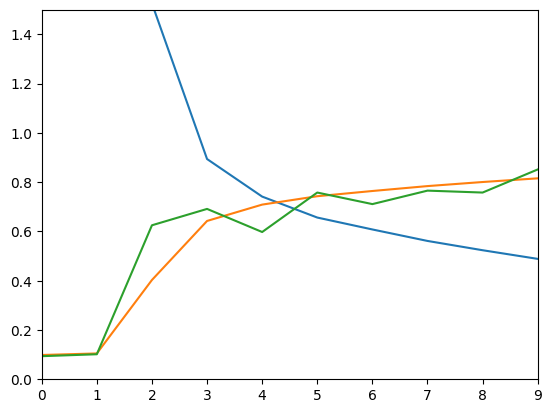

In [12]:
plot_metrics(train_metrics,0,1.5)

Text(0.5, 1.0, 'Real Group: 3, Calculated Group: 3')

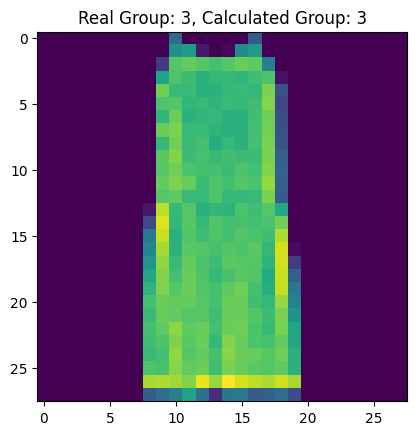

In [13]:
test_item = random.choice(mnist_test)
result = net(test_item[0].reshape(1,1,28,28))
fig, ax = plt.subplots()
ax.imshow(test_item[0].reshape((28,28)))
ax.set_title(f"Real Group: {test_item[1]}, Calculated Group: {result.argmax()}")